# Implementation student performance with linear regression algorithm

In [22]:
import numpy as np                # Library untuk komputasi python 
import pandas as pd               # Library untuk ETL Python 
import matplotlib.pyplot as plt   # Library untuk visualisasi data python 
import seaborn as sns             # Library untuk visualisasi data python 
from scipy.stats import norm      # Library untuk statistika python 
from sklearn import linear_model  # Library untuk model Regresi Linier 
from sklearn.model_selection import train_test_split # library untuk membagi data training dan testing 
from sklearn import metrics       # Library untuk pengukuran kinerja model 
from sklearn.preprocessing import LabelEncoder # Library untuk encoder data kategorik
import joblib

%matplotlib inline 
sns.set(color_codes=True)
sns.set_theme(style="whitegrid")
plt.style.use('bmh')

## Load and Information Datasheet

In [2]:
# Load datasheet dan tampilkan 5 data teratas dan terakhir 
data_siswa = pd.read_csv("datasheet/StudentsPerformance.csv")
data_siswa.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# tampilkan 5 data terkahir 
data_siswa.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<ul>
    <li><h3>Insight</h3></li>
    <p> terlihat bahwa 5 data teratas dan terakhir pada datasheet yang kita gunakan memiliki fitur yang beragam</p>
    <p> pada tahap ini mempelajari informasi yang ada pada datasheet sebelum diproses lebih lanjut</p>
<ul/>

In [4]:
# proporsi jumlah data dan baris pada datasheet 
print("Proporsi jumlah data dan baris pada datasheet : ", data_siswa.shape)
print("Proporsi jumlah baris pada datasheet : ", data_siswa.shape[0], "baris")
print("Proporsi jumlah kolom pada datasheet : ", data_siswa.shape[1], "kolom")
# tampilkan informasi pada datasheet 
print(data_siswa.info())

Proporsi jumlah data dan baris pada datasheet :  (1000, 8)
Proporsi jumlah baris pada datasheet :  1000 baris
Proporsi jumlah kolom pada datasheet :  8 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


<ul>
    <li>
        <h3>Insight</h3>
        <p>proporsi data yang digunakan sebesar (1000, 8)</p>
        <p>jumlah baris pada data sebanyak 1000 baris</p>
        <p>jumlah kolom pada data sebanyak 8 kolom</p>
    </li>
    <p>dari infomasi yang didapat pada data memliki tipe data object dan int64 dan tidak terdapat nilai null</p>
</ul>

# Exploratory data analysis (EDA)

## Data Preparation

In [5]:
# mengecek kolom yang bernilai kosong 
data_siswa[data_siswa.isna().all(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<ul>
    <li><h3> Insight </h3></li>
    <p>terlihat bahwa datasheet yang kita gunakan tidak memiliki nilai yang missing value sehingga dapat dilanjutkan ke tahap berikut nya</p>
</ul>

### merubah nama fitur pada datasheet 

<p>sebelum dilakukan preprocessing data kita perlu merubah nama tabel agar dapat memudahkan kita memahami data</p>

In [6]:
# ubah nama setiap kolom pada datasheet 
data_siswa = data_siswa.rename(columns={"gender":"jenis kelamin","race/ethnicity":"kelompok",
                                        "parental level of education":"tingkat pendidikan", "lunch":"level",
                                        "test preparation course":"persiapan tes","math score":"nilai matematika",
                                        "reading score":"nilai membaca","writing score":"nilai menulis"})
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Knowladge

### Distribusi Normal pada fitur datasheet 

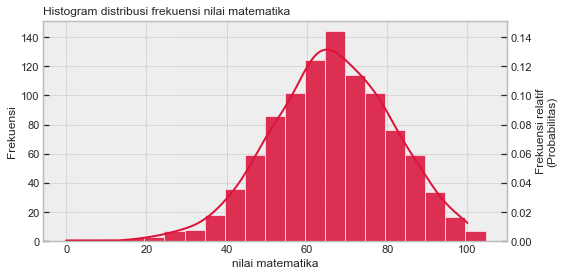

In [7]:
# histogram visualization skor matematika 
fig, ax = plt.subplots(figsize=(8,4))

# histogram untuk frekuensi data skor matematika 
sns.histplot(data_siswa['nilai matematika'], binwidth=5,  # atur jarak antar histogram 
             binrange=(data_siswa['nilai matematika'].min() - 0.5,  # nilai data minimal
                       data_siswa['nilai matematika'].max() + 0.5), # nilai data maksimal 
             ec="w", color = "crimson", ax=ax) 

# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()

# buat plot histogram untuk komulatif 
sns.histplot(data_siswa['nilai matematika'], stat="probability", binwidth=5,  # atur jarak antar histogram 
             binrange=(data_siswa['nilai matematika'].min() - 0.5,   # nilai data minimal
                       data_siswa['nilai matematika'].max() + 0.5),  # nilai data maksimal
             kde=True ,ec="w", color="crimson", ax=ax1)

# buat sumbu x plot 1 untuk label nilai matematika dengan fontsize sebesar 12
ax.set_xlabel("nilai matematika", fontsize=12)
# buat sumbu y plot 1 untuk label untuk frekuensi data 
ax.set_ylabel("Frekuensi", fontsize=12)
# buat sumbu y plot 2 frekuensi relatif 
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
# buat grid untuk plot sumbu y
ax1.grid(axis="y")
# tampilkan hasil visualisasi
plt.title("Histogram distribusi frekuensi nilai matematika", fontsize=12, loc='left')
plt.tight_layout()
plt.show()

In [8]:
# statistik deskriptif dari nilai matematika 
print("jumlah rata - rata nilai matematika : ", data_siswa['nilai matematika'].mean())
print("nilai tengah dari nilai matematika  : ", data_siswa['nilai matematika'].median())
print("nilai yang paling sering muncul     : ", data_siswa['nilai matematika'].mode())

jumlah rata - rata nilai matematika :  66.089
nilai tengah dari nilai matematika  :  66.0
nilai yang paling sering muncul     :  0    65
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
       dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada ujian matematika sebesar    
       66.089 
    </p>
    <p>
       nilai tengah dari keselurahan data pada kolom nilai matematika sebesar 66.0
    </p>
    <p>
        nilai yang sering muncul pada ujian matematika banyak siswa yang mendapat nilai 0 dan 65 dari keseluruhan data
    </p>
<ul>

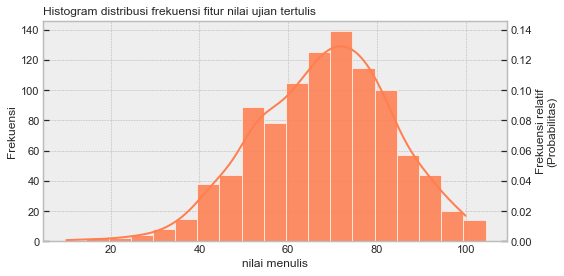

In [9]:
# histogram visualization skor menulis
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai menulis'], binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             ec="w", color="coral", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai menulis'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min() - 0.5, 
                       data_siswa['nilai menulis'].max() + 0.5), 
             kde=True ,ec="w", color="coral", ax=ax1)

ax.set_xlabel("nilai menulis", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi fitur nilai ujian tertulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

In [10]:
# statistik deskriptif kolom nilai ujian tertulis
print("nilai rata - rata dari ujian tertulis        : ", data_siswa['nilai menulis'].mean())
print("nilai tengah dari kolom ujian tertulis       : ", data_siswa['nilai menulis'].median())
print("nilai yang sering muncul dari nilai tertulis : ", data_siswa['nilai menulis'].mode())

nilai rata - rata dari ujian tertulis        :  68.054
nilai tengah dari kolom ujian tertulis       :  69.0
nilai yang sering muncul dari nilai tertulis :  0    74
dtype: int64


<ul>
  <li> 
      <h3>Insight</h3>
  </li>
    <p> 
     dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada 
     ujian tertulis sebesar 68.054
    </p>
    <p>
        nilai tengah dari keseluruhan dari ujian tertulis sebesar 69.0
    </p>
    <p>nilai yang sering muncul dari nilai ujian tertulis sebesar 0 dan 74</p>
</ul>

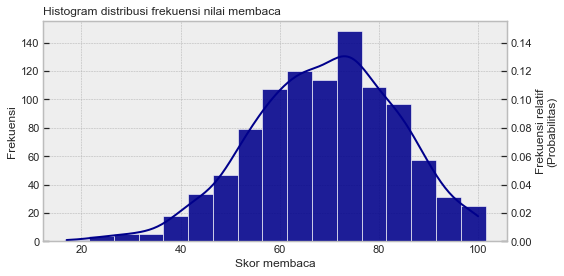

In [11]:
# histogram visualization skor membaca 
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai membaca'], binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             ec="w", color="#00008B", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai membaca'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min() - 0.5, 
                       data_siswa['nilai membaca'].max() + 0.5), kde=True ,
             ec="w", color="#00008B", ax=ax1)

ax.set_xlabel("Skor membaca", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi nilai membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

In [12]:
# statistik deskriptif kolom nilai membaca 
print("nilai rata - rata dari kolom ujian lisan sebesar        : ", data_siswa['nilai membaca'].mean())
print("nilai tengah dari kolom nilai ujian lisan sebesar       : ", data_siswa['nilai membaca'].median())
print("nilai yang sering muncul pada kolom ujian lisan sebesar : ", data_siswa['nilai membaca'].mode())

nilai rata - rata dari kolom ujian lisan sebesar        :  69.169
nilai tengah dari kolom nilai ujian lisan sebesar       :  70.0
nilai yang sering muncul pada kolom ujian lisan sebesar :  0    72
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        rata-rata siswa mendapatkan nilai ujian lisan sebesar 69.169
    <p>
</ul>

### Distribusi normal komulatif 

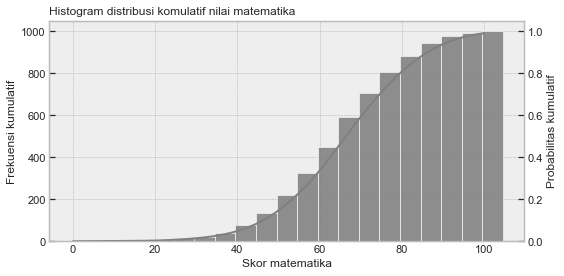

In [13]:
# Distribusi normal komulatif untuk fitur skor matematika 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai matematika'], binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min()-0.5, 
                       data_siswa['nilai matematika'].max()+0.5), 
             cumulative=True, ec="w", color="grey", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai matematika'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min()-0.5, 
                       data_siswa['nilai matematika'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="grey", ax=ax1)
# set label
ax.set_xlabel("Skor matematika", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif nilai matematika", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

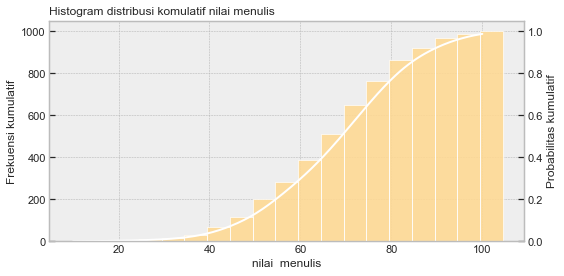

In [14]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai menulis'], binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             cumulative=True, ec="w", color="orange", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai menulis'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("nilai  menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif nilai menulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

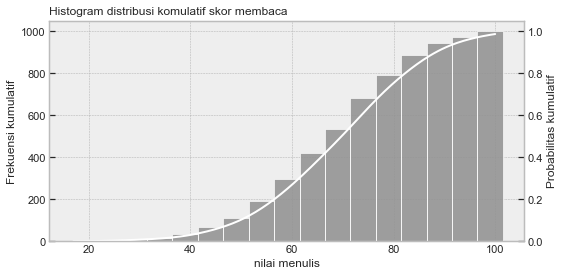

In [15]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai membaca'], binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             cumulative=True, ec="w", color="black", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai membaca'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("nilai menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif skor membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

### Probability density function(pdf) dan cumulative density function (cdf)

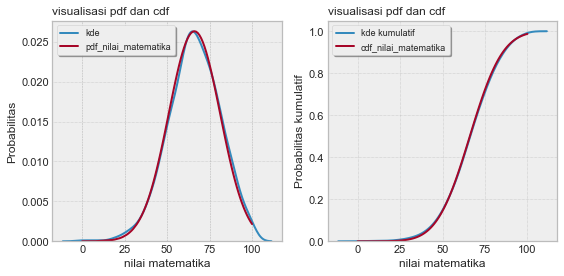

In [16]:
# membuat grafik pdf (probility density function) dan cdf (cumulative density function)
nilai_matematika_mean = data_siswa['nilai matematika'].mean() # buat variabel untuk menghitung nilai mean 
nilai_matematika_std  = data_siswa['nilai matematika'].std()  # buat variabel untuk menghtung nilai standar deviasi 

# perhitungan pdf untuk nilai matematika dengan library scipy 
pdf_nilai_matematika = norm.pdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)
# perthitungan cdf untuk nilai matematika dengan library scipy
cdf_nilai_matematika = norm.cdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)

# buat subplots untuk grafik pdf dan cdf
fig, axs = plt.subplots(1, 2,figsize=(8, 4))
# plot grafik untuk pdf 
sns.kdeplot(x =data_siswa['nilai matematika'], lw=2, ax=axs[0])
sns.lineplot(x= data_siswa['nilai matematika'], y = pdf_nilai_matematika, lw=2, ax=axs[0])

# plot grafik untuk cdf
sns.kdeplot (x = data_siswa['nilai matematika'], cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x = data_siswa['nilai matematika'], y = cdf_nilai_matematika, lw=2, ax=axs[1])

# buat legenda untuk informasi plot 1 dan 2 
axs[0].legend(["kde","pdf_nilai_matematika"], shadow = True ,fontsize=9, loc="upper left")
axs[1].legend(["kde kumulatif", "cdf_nilai_matematika"], shadow = True, fontsize=9)

# buat plot sumbu y pada plot 1
axs[0].set_ylabel("Probabilitas", fontsize=12)

# buat fungsi perulangan untuk sumbu x pada semua plot-
for ax in axs:
    ax.set_xlabel("nilai matematika", fontsize=12) # set font 12 pada sumbu x
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left")
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
        
ax.set_ylabel("Probabilitas kumulatif", fontsize=12) # set font 12 pada sumbu y

# tampilkan hasil visualisasi 
plt.tight_layout()
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

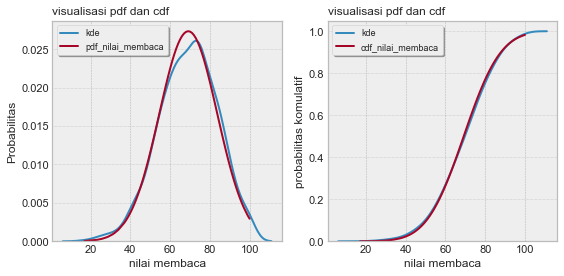

In [17]:
# membuat grafik untuk visualisasi pdf dan cdf kolom nilai membaca 
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# tentukan nilai mean dan standar deviasi untuk kolom nilai 
nilai_membaca_mean = data_siswa['nilai membaca'].mean() # code mean dari kolom membaca 
nilai_membaca_std  = data_siswa['nilai membaca'].std()  # code std dari kolom membaca 

# tentukan nilai norm pdf dan cdf untuk kolom nilai membaca 
pdf_nilai_membaca = norm.pdf(data_siswa['nilai membaca'], loc=nilai_membaca_mean, scale=nilai_membaca_std) # pdf code
cdf_nilai_membaca = norm.cdf(data_siswa['nilai membaca'], loc=nilai_membaca_mean, scale=nilai_membaca_std) # cdf code

# buat subplots 1 untuk visualisasi lineplot dan kdeplot
sns.kdeplot(x = data_siswa['nilai membaca'], lw=2, ax=axs[0]) # sub plot 1 untuk visualisasi kdeplot
sns.lineplot(x= data_siswa['nilai membaca'], y=pdf_nilai_membaca, lw=2, ax=axs[0]) # sub plot 1 untuk visualisasi lineplot

# buat subplots 2 untuk visualisasi lineplot dan kdeplot
sns.kdeplot (x = data_siswa['nilai membaca'], cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x = data_siswa['nilai membaca'], y = cdf_nilai_membaca, lw=2, ax=axs[1])

# set sumbu y untuk plot 1
axs[0].set_ylabel("Probabilitas", fontsize=12)
# buat perulangan untuk set sumbu xlabel di plot 1 dan plot 2
for ax in axs:
    ax.set_xlabel("nilai membaca", fontsize=12)
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left" )
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
    
# set sumbu y untuk plot 2
axs[1].set_ylabel("probabilitas komulatif", fontsize=12)

# set legenda untuk plot 1 dan 2
axs[0].legend(["kde","pdf_nilai_membaca"], shadow=True, fontsize=9, loc="upper left") # plot 1
axs[1].legend(["kde","cdf_nilai_membaca"], shadow=True, fontsize=9, loc="best")       # plot 2

# tampilkan visualisasi
plt.tight_layout()
plt.show()

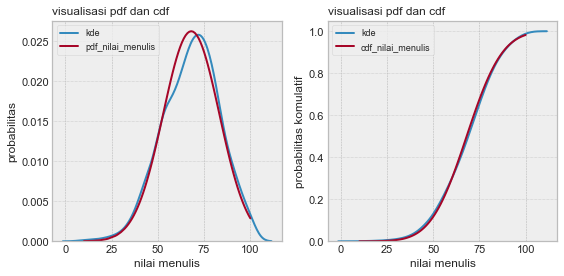

In [18]:
# membuat grafik untuk visualisasi pdf dan kde 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# menghitung nilai mean dan std dari kolom nilai menulis 
nilai_menulis_mean = data_siswa['nilai menulis'].mean() # code untuk menghitung nilai mean
nilai_menulis_std  = data_siswa['nilai menulis'].std()  # code untuk menghitung nilai std

# menghitung nilai norm untuk pdf dan cdf
pdf_nilai_menulis = norm.pdf(data_siswa['nilai menulis'], loc=nilai_menulis_mean, scale=nilai_menulis_std) # code untuk pdf 
cdf_nilai_menulis = norm.cdf(data_siswa['nilai menulis'], loc=nilai_menulis_mean, scale=nilai_menulis_std) # code untuk cdf

# visualisasikan kde dan line plot untuk sumbu 1 dan sumbu 2
sns.kdeplot ( x = data_siswa['nilai menulis'], lw = 2, ax=axs[0])                        # pdf plot sumbu 1
sns.lineplot( x = data_siswa['nilai menulis'], y  = pdf_nilai_menulis, lw=2, ax=axs[0])  # cdf plot sumbu 1
sns.kdeplot ( x = data_siswa['nilai menulis'], cumulative = True,     lw = 2, ax=axs[1]) # pdf komulatif sumbu 2
sns.lineplot( x = data_siswa['nilai menulis'], y = cdf_nilai_menulis, lw = 2, ax=axs[1]) # cdf plot sumbu 2

# buat legenda untuk sumbu plot 1 dan 2
axs[0].legend(["kde","pdf_nilai_menulis"], fontsize = 9, loc="upper left") # plo 1
axs[1].legend(["kde","cdf_nilai_menulis"], fontsize = 9) # plo 2

# set sumbu y untuk plot 1 dan 2
axs[0].set_ylabel("probabilitas", fontsize = 12)          # plot 1
axs[1].set_ylabel("probabilitas komulatif",fontsize = 12) # plot 2

# buat perulangan untuk sumbu x plot 1 dan 2
for ax in axs:
    ax.set_xlabel("nilai menulis", fontsize = 12)
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left" )
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)

# tampilkan hasil visualisasi 
plt.tight_layout()
plt.show()

### Analisis Bivariat data kategorik dengan barplot

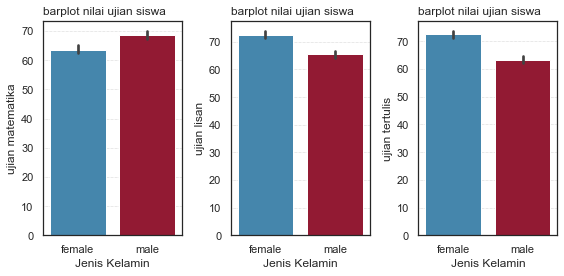

In [71]:
# buat subplots menjadi 3 bagian  
fig, axs = plt.subplots(1, 3, figsize=(8,4))

# visualisasi data jenis kelamin dan nilai matematika 
sns.barplot(x="jenis kelamin", y="nilai matematika", data=data_siswa, ax=axs[0]) # plot 1
sns.barplot(x="jenis kelamin", y="nilai membaca"   , data=data_siswa, ax=axs[1]) # plot 2
sns.barplot(x="jenis kelamin", y="nilai menulis"   , data=data_siswa, ax=axs[2]) # plot 3

# set y label untuk plot 1
axs[0].set_ylabel("ujian matematika", fontsize=12)

# buat perulangan untuk plot ax x label dari 3 bagian visualisasi
for ax in axs:
    ax.set_xlabel("Jenis Kelamin", fontsize=12)
    ax.set_title("barplot nilai ujian siswa", fontsize=12, loc="left")
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
    
# set y label untuk plot 2 dan 3
axs[1].set_ylabel("ujian lisan", fontsize=12)
axs[2].set_ylabel("ujian tertulis", fontsize=12)

# tampilkan visualisasi 
plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
        <p> berdasarkan hasil visualisasi berikut siswa laki-laki memiliki nilai yang unggul 70 % pada ujian matematika dan 60% sisanya adalah perempuan<p>
        <p> sedangkan siswa perempuan unggul dalan ujian lisan dan ujian tertulis dengan 70 % dibandingkan dengan siswa laki-laki</p>
    </li> 
</ul>

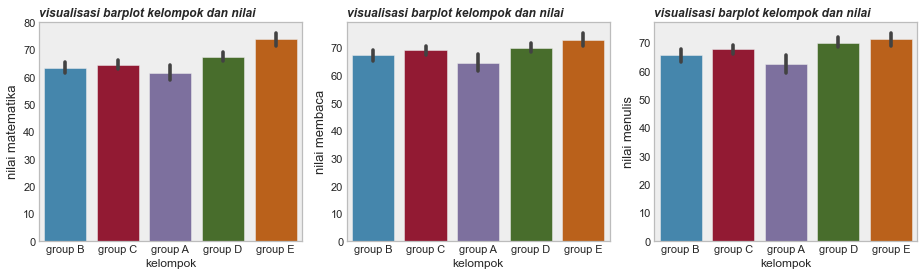

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(13,4))
sns.barplot(x = "kelompok", y = "nilai matematika", data = data_siswa, ax=axs[0])
sns.barplot(x = "kelompok", y = "nilai membaca",    data = data_siswa, ax=axs[1])
sns.barplot(x = "kelompok", y = "nilai menulis",    data = data_siswa, ax=axs[2])

for ax in axs:
    ax.set_xlabel("kelompok",fontsize=12, fontstyle="normal")
    ax.set_title("visualisasi barplot kelompok dan nilai", 
                 fontsize=12, fontweight="bold", fontstyle="oblique", loc="left")
    ax.grid(axis="y")
    
axs[0].set_ylabel("nilai matematika", fontsize=13, fontstyle="normal")
axs[1].set_ylabel("nilai membaca",    fontsize=13, fontstyle="normal")
axs[2].set_ylabel("nilai menulis",    fontsize=13, fontstyle="normal")

plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
        <p>pada visualisasi diatas Grup E memiliki nilai tertinggi untuk ujian matematika dan nilai tertulis dengan nilai matematika 80 % dan ujian lisan dan ujian tulis sebesar 70% </p>
        <p>disusul dengan grup D yang memiiki nila tertinggi kedua dengan rentang nilai 70 % untuk ujian tulis dan lisan dan 65 % untuk nilai matematika 
    </li>
</ul>

###  Deteksi nilai outliers

<AxesSubplot:xlabel='nilai matematika', ylabel='persiapan tes'>

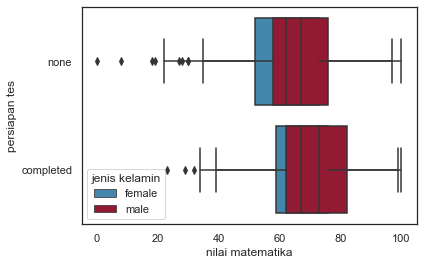

In [112]:
sns.boxplot(data = data_siswa, x = "nilai matematika", y = "persiapan tes", hue="jenis kelamin", dodge=False)

<AxesSubplot:xlabel='nilai membaca', ylabel='persiapan tes'>

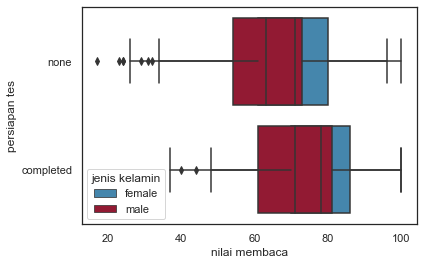

In [113]:
sns.boxplot(data = data_siswa, x = "nilai membaca", y = "persiapan tes", hue="jenis kelamin", dodge=False)

<AxesSubplot:xlabel='nilai menulis', ylabel='persiapan tes'>

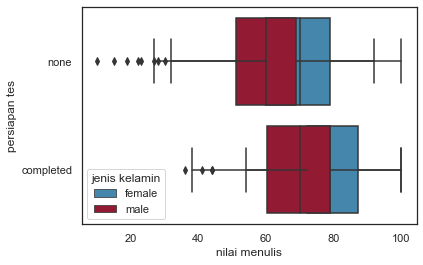

In [114]:
sns.boxplot(data = data_siswa, x = "nilai menulis", y = "persiapan tes", hue="jenis kelamin", dodge=False)

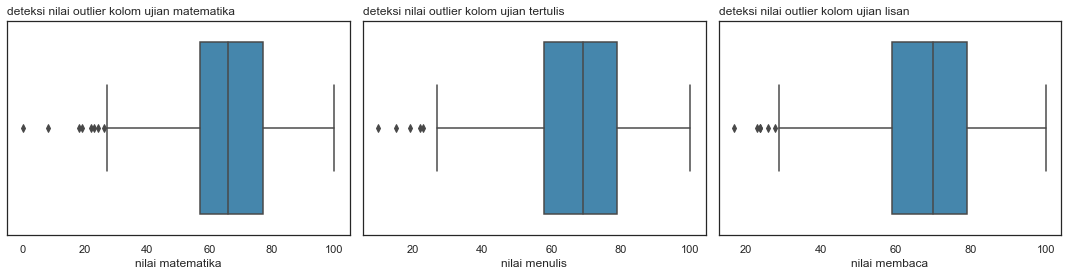

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(x = data_siswa['nilai matematika'], ax=axs[0])
sns.boxplot(x = data_siswa['nilai menulis'], ax=axs[1])
sns.boxplot(x = data_siswa['nilai membaca'], ax=axs[2])

axs[0].set_title("deteksi nilai outlier kolom ujian matematika", loc="left", fontsize=12)
axs[1].set_title("deteksi nilai outlier kolom ujian tertulis",   loc="left", fontsize=12)
axs[2].set_title("deteksi nilai outlier kolom ujian lisan",      loc="left", fontsize=12)

plt.tight_layout()
plt.show()

### Statistik deskriptif

In [130]:
data_siswa.describe().T

,count,mean,std,min,25%,50%,75%,max
nilai matematika,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
nilai membaca,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
nilai menulis,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Analisa Multivariat dengan diagram pairplot

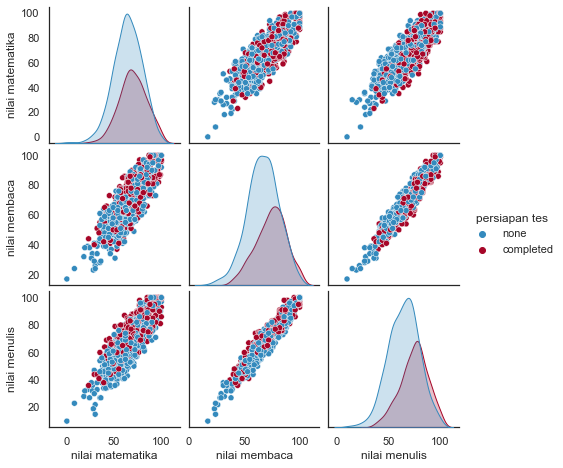

In [48]:
sns.set_theme(style="white", palette=None)
sns.pairplot(data_siswa,  hue="persiapan tes", diag_kind="kde",height=2.2)

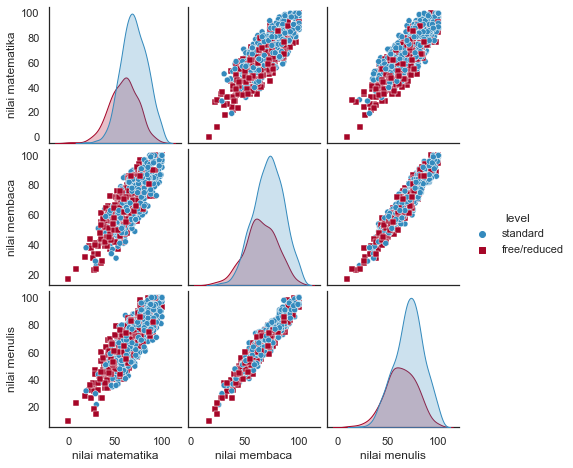

In [70]:
sns.pairplot(data_siswa, hue="level", diag_kind="auto", markers=["o", "s"], height=2.2)
#sns.pairplot(data_siswa, hue="level",corner=True)

In [99]:
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### mencari Korelasi antara sumbu x dan y pada data siswa

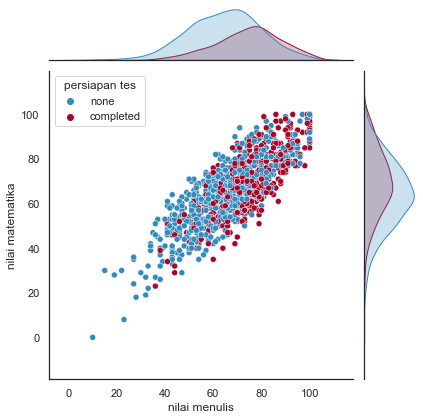

In [101]:
sns.jointplot(data=data_siswa, x=data_siswa['nilai menulis'], y= data_siswa['nilai matematika'], hue='persiapan tes')

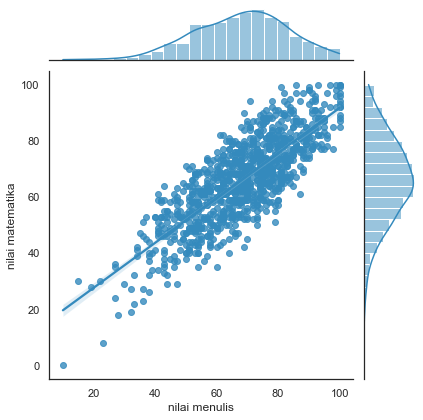

In [103]:
sns.jointplot(data=data_siswa, x=data_siswa['nilai menulis'], y= data_siswa['nilai matematika'], kind="reg")

In [66]:
data_siswa[['nilai menulis','nilai matematika']].corr("kendall")

,nilai matematika,nilai menulis
nilai matematika,1.000000,0.591067
nilai menulis,0.591067,1.000000


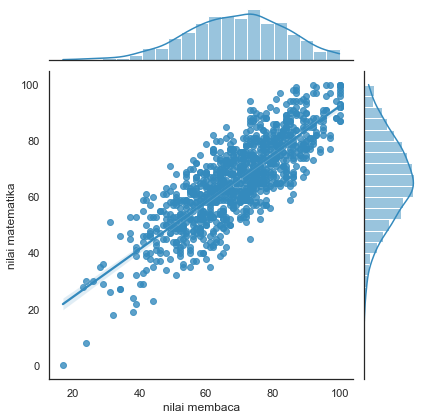

In [95]:
sns.jointplot(data=data_siswa, x="nilai membaca", y="nilai matematika", kind="reg")

In [89]:
data_siswa[['nilai matematika','nilai membaca']].corr("kendall")

,nilai matematika,nilai membaca
nilai matematika,1.000000,0.617432
nilai membaca,0.617432,1.000000


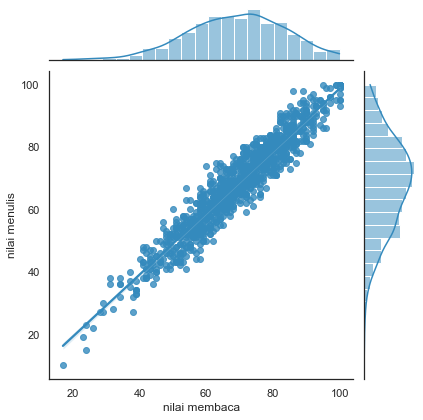

In [90]:
sns.jointplot(data=data_siswa, x='nilai membaca', y='nilai menulis', kind='reg')

In [92]:
data_siswa[['nilai menulis', 'nilai membaca']].corr("kendall")

,nilai menulis,nilai membaca
nilai menulis,1.000000,0.820058
nilai membaca,0.820058,1.000000


## Data Cleaning

In [31]:
# menghapus kolom yang tidak digunakan
data_siswa = data_siswa.drop(['gender','race/ethnicity','parental level of education',
                              'lunch','test preparation course'], axis=1)
data_siswa.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
